In [1]:
import sys
import os
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
import pascal5i_reader

In [2]:
# Set some parameters and define some helper function
base_dir = "/data"
# Set this to true if you don't have the dataset yet and would like to download
download = False

if download:
    # Use torchvision download routine to download dataset to base_dir
    from torchvision import datasets
    sbd_path = os.path.join(base_dir, 'sbd')
    sbd_set = datasets.SBDataset(sbd_path, image_set='train', mode="segmentation", download=True)
    voc_set = datasets.VOCSegmentation(base_dir, image_set='train', download = True)

# A generalized imshow helper function which supports displaying (CxHxW) tensor
def generalized_imshow(arr):
    if isinstance(arr, torch.Tensor) and arr.shape[0] == 3:
        arr = arr.permute(1, 2, 0)
    plt.imshow(arr)
    plt.show()

In [3]:
# Validation set with folding number = 2
# According to OSLSM (https://arxiv.org/pdf/1709.03410.pdf),
# the validation set contains label
# [dinningtable, dog, horse, motorbike, person]
# corresponding label_map:
#  [0: background,
#   1: dinningtable,
#   2: dog,
#   3: horse,
#   4: motorbike,
#   5: person]

val_ds = pascal5i_reader.Pascal5iReader(base_dir, 2, False)

  0%|          | 0/327 [00:00<?, ?it/s]

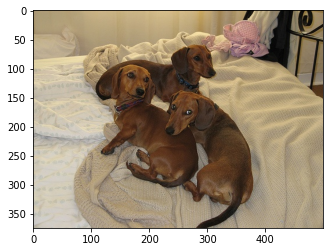

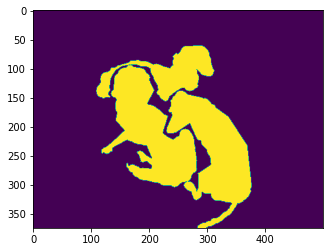

  4%|▍         | 14/327 [00:00<00:05, 57.77it/s]


In [4]:
# Visualize dogs
# the offseted label of dog in the validation set is 2
vis_id = 2
for i in trange(len(val_ds)):
    img, target = val_ds[i]
    if vis_id in target:
        generalized_imshow(img)
        generalized_imshow(target == vis_id)
        break

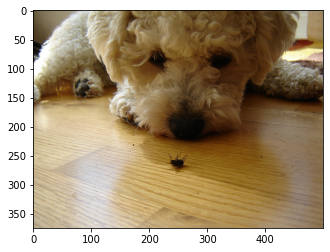

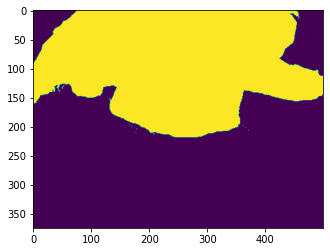

In [5]:
dog_images_list = val_ds.get_img_containing_class(vis_id)
img_idx = random.choice(dog_images_list)
img, target = val_ds[img_idx]
generalized_imshow(img)
generalized_imshow(target == vis_id)

In [6]:
# There should only be 5 foreground classes in the validation set
for i in trange(len(val_ds)):
    img, target = val_ds[i]
    if (target > 5).any():
        raise ValueError

100%|██████████| 327/327 [00:00<00:00, 399.96it/s]


In [7]:
# There should only be 15 foreground classes in the training set
train_ds = pascal5i_reader.Pascal5iReader(base_dir, 0, True)
for i in trange(len(train_ds)):
    img, target = train_ds[i]
    if (target > 15).any():
        raise ValueError

100%|██████████| 9387/9387 [00:32<00:00, 292.42it/s]


In [8]:
# Time to grab an image from the training set
%timeit train_ds[123]

3.18 ms ± 197 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
# Time to grab an image from the validation set
%timeit val_ds[123]

2.34 ms ± 92.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
